# Combine data

In [39]:
import pandas as pd
import os
import numpy as np
from itertools import product
from shapely.geometry import LinearRing, Polygon, Point, LineString
import geopandas as gpd

pickles = '../data/pickles/'

# Read Pickle Files

In [4]:
os.listdir(pickles)

['bathymetry.pkl',
 'ca_counties.pkl',
 'crit_species.pkl',
 'kelp_biomass.pkl',
 'mpa.pkl',
 'nes_occupation.pkl',
 'qcew_occupation.pkl',
 'sst_ca.pkl']

In [5]:
#Pickle files come from data/read_data.ipynb and
bathymetry = pd.read_pickle(pickles+'bathymetry.pkl')

In [6]:
ca_counties = pd.read_pickle(pickles+'ca_counties.pkl')

In [7]:
crit_species = pd.read_data(pickles+'crit_species.pkl')

AttributeError: module 'pandas' has no attribute 'read_data'

In [ ]:
protected_areas = pd.read_pickle(pickles+'mpa.pkl')

In [ ]:
occupation_nes = pd.read_pickle(pickles+'nes_occupation.pkl')

In [ ]:
occupation_qcew = pd.read_pickle(pickles+'qcew_occupation.pkl')

In [ ]:
kelp_biomass =pd.read_pickle(pickles+'kelp_biomass.pkl')

In [ ]:
sst = pd.read_pickle(pickles+'sst_ca.pkl')

# Create grid of California

In [23]:
def squarify(point, increment):
    return Polygon([(point[0], point[1]),
     (point[0] + increment, point[1]), 
     (point[0] + increment, point[1] + increment), 
     (point[0], point[1] + increment)])

def desquarify(left_vertices, right_vertices, square_length):
    x_num = round((right_vertices[0] - left_vertices[0])/square_length, 0)
    y_num = round((right_vertices[1] - left_vertices[1])/square_length, 0)
    x_lengths = np.linspace(left_vertices[0], right_vertices[0]-square_length, x_num)
    y_lengths = np.linspace(left_vertices[1], right_vertices[1]-square_length, y_num)
    return [p for p in product(x_lengths, y_lengths)]

In [36]:
#create vertices for California
#roughly the bounds of california going out 8km past cape mendocino
width = .1
grid_bottomleft_vertices = desquarify((32.534343,-124.511849),(42.00,-117.123885), width)
grid = [squarify(i, width) for i in grid_bottomleft_vertices]

/home/clay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/home/clay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


[(32.534343, -124.511849), (32.534343, -124.41201387671232), (32.534343, -124.31217875342466)]
POLYGON ((32.534343 -124.511849, 32.634343 -124.511849, 32.634343 -124.411849, 32.534343 -124.411849, 32.534343 -124.511849))


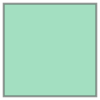

In [37]:
print(grid_bottomleft_vertices[:3])
print(grid[0])
grid[0]

In [40]:
grid_df = gpd.GeoDataFrame(geometry=grid, crs = {'init' : 'epsg:4326'})
grid_df["polygon_id"] = range(len(grid))